In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')
import requests
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/flatshort.csv')

In [6]:
df.shape

(19088, 5)

In [4]:
corrm = df.corr()
corrm

,town,flat_type,street_name,flat_model,resale_price
town,1.000000,0.064964,0.845494,0.078918,0.007636
flat_type,0.064964,1.000000,0.107432,0.456635,0.905270
street_name,0.845494,0.107432,1.000000,0.130480,0.074620
flat_model,0.078918,0.456635,0.130480,1.000000,0.468390
resale_price,0.007636,0.905270,0.074620,0.468390,1.000000


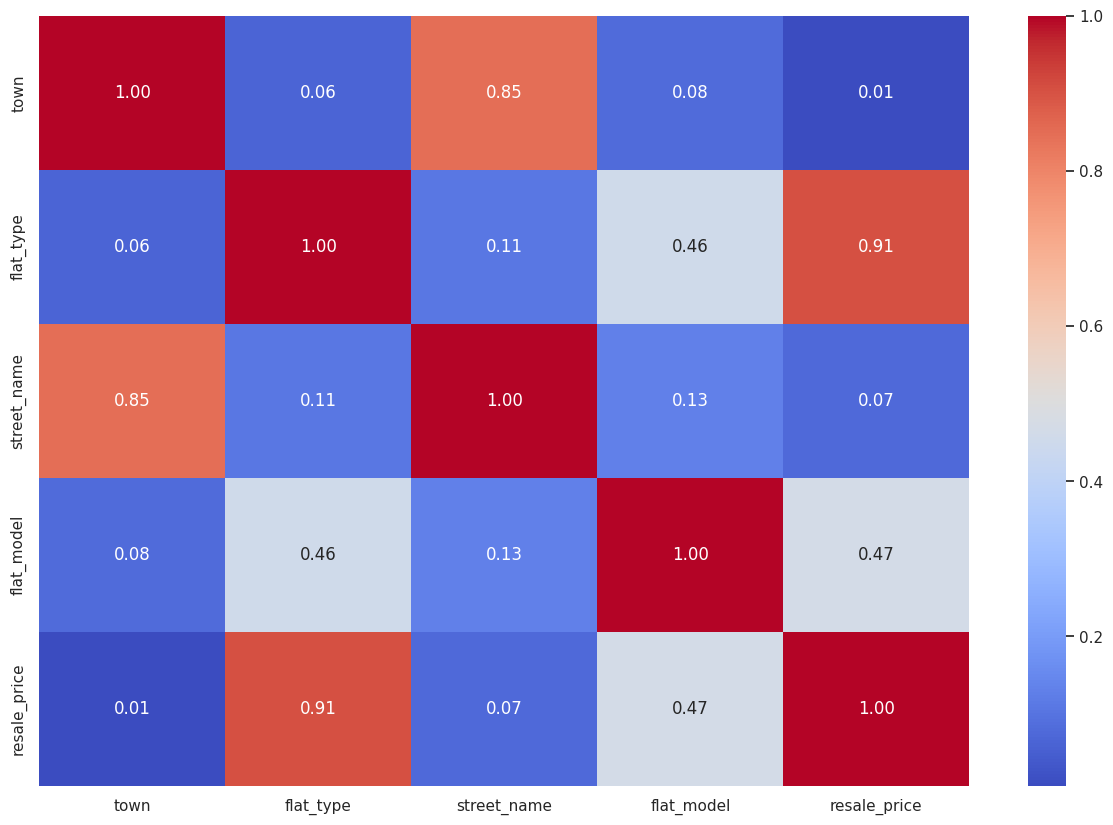

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(corrm, annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
#create model
# Load the dataset
df = pd.read_csv('/flatshort.csv')

# Drop rows with NaN values in the 'resale_price' column
df.dropna(subset=['resale_price'], inplace=True)

# Define features and target
x = df.drop(['resale_price'], axis=1)
y = df['resale_price']

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the model
rf_regressor = RandomForestRegressor(random_state=42)
model = rf_regressor.fit(x_train, y_train) # This line should now work without error

# ... (rest of your code)

y_pred = rf_regressor.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", rf_r2)


Mean Absolute Error (MAE): 7531.407248895128
Mean Squared Error (MSE): 132526373.7742401
Root Mean Squared Error (RMSE): 11512.009979766353
R-squared (R2) Score: 0.9301096376837583


In [9]:
model

RandomForestRegressor(random_state=42)

In [10]:
import pickle
from google.colab import files

pkl_filename = "FlatshortRFRegresson.pkl"
with open(pkl_filename,'wb') as file:
  pickle.dump(model,file)

#files.download(pkl_filename)
print("Saved to disk")

Saved to disk


In [11]:
files.download(pkl_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from joblib import dump

dump(model, 'flat_random_forest.joblib')

print("Model saved successfully!")

Model saved successfully!
